In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
advertising = pd.read_csv("advertising.csv")# TODO 1
advertising.head()# TODO 2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# TODO: 데이터프레임 정보 확인하기
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# TODO: 통계정보 확인하기
advertising.describe()#Radio의 최솟값

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# TODO: 통계 정보 행과 열 바꾸기
advertising.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
TV,230.1,44.5,17.2,151.5,180.8,8.7,57.5,120.2,8.6,199.8,...,39.5,75.5,17.2,166.8,149.7,38.2,94.2,177.0,283.6,232.1
Radio,37.8,39.3,45.9,41.3,10.8,48.9,32.8,19.6,2.1,2.6,...,41.1,10.8,4.1,42.0,35.6,3.7,4.9,9.3,42.0,8.6
Newspaper,69.2,45.1,69.3,58.5,58.4,75.0,23.5,11.6,1.0,21.2,...,5.8,6.0,31.6,3.6,6.0,13.8,8.1,6.4,66.2,8.7
Sales,22.1,10.4,12.0,16.5,17.9,7.2,11.8,13.2,4.8,15.6,...,10.8,11.9,5.9,19.6,17.3,7.6,14.0,14.8,25.5,18.4


In [6]:
# TODO: 컬럼간의 상관계수 확인하기
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [7]:
corrMatrix =advertising.corr()

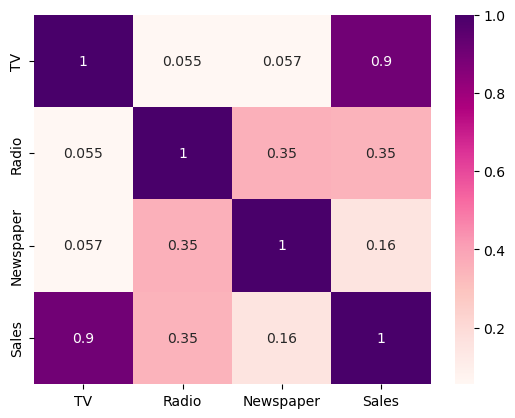

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corrMatrix, annot=True, cmap='RdPu')
plt.show()

In [9]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화
corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending= False) #TODO:YOUR_CODE_HERE
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


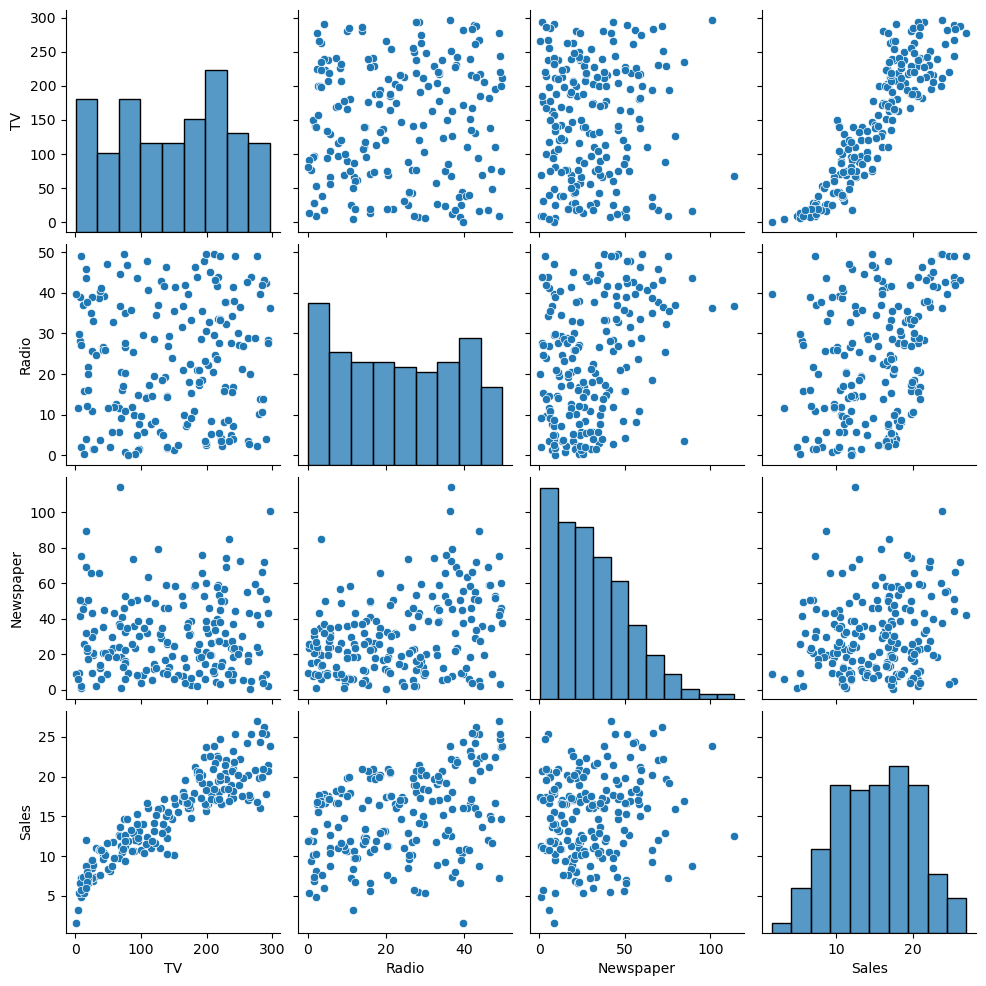

In [10]:
sns.pairplot(advertising)
plt.show()

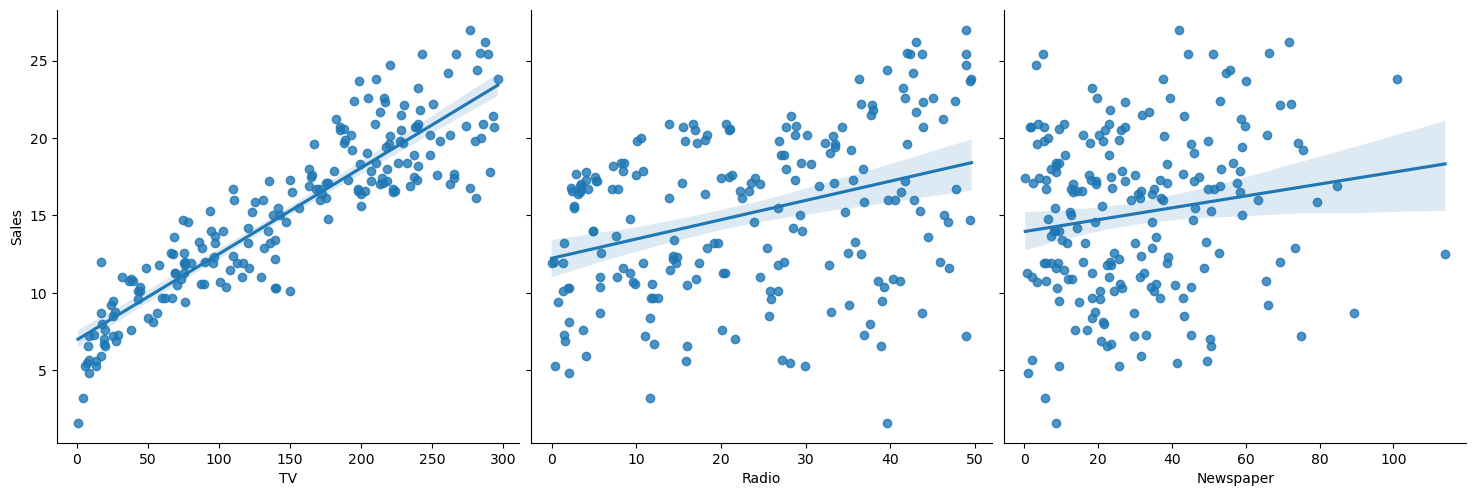

In [11]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기

sns.pairplot(data=advertising, height=5,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',kind='reg') #TODO:YOUR_CODE_HERE
plt.show()

### 단순 선형 회귀

In [12]:
# 단순 선형 회귀로 모델 학습하고 평가하기

In [13]:
#독립변수로 TV 컬럼만 가져온다.
X_data1 = advertising[['TV']] # TODO:YOUR_CODE_HERE

#종속변수로 Sales 데이터를 가져온다
y_data1 = advertising['Sales']# TODO:YOUR_CODE_HERE

display(X_data1)
display(y_data1)

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [14]:
# 속성값의 차이가 있으므로 속성값의 범위를 일정하게 맞춰주는 방법으로 표준화 적용
# 표준화를 이용하여 평균이 0이고 표준편차가 1인 정규분포로 만들기

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_data1)
X_scaled1

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [15]:
# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 10
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1,y_data1,test_size=0.3,random_state=101) # TODO:YOUR_CODE_HERE
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [16]:
from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression()# 선형 회귀 모델 생성 TODO:YOUR_CODE_HERE
lr_model1.fit(X_train1, y_train1)# 선형 회귀 모델 학습 TODO:YOUR_CODE_HERE

LinearRegression()

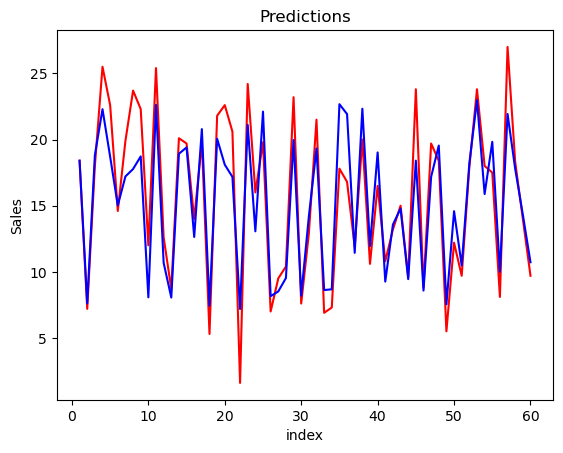

In [17]:
y_pred1 = lr_model1.predict(X_test1)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

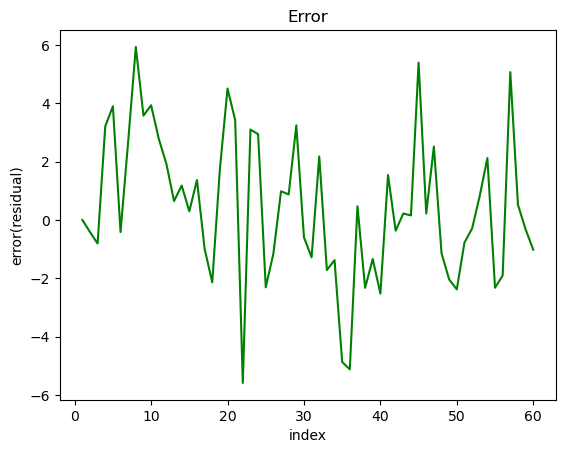

In [18]:
error = y_test1-y_pred1 # 실젯값 - 예측값 TODO:YOUR_CODE_HERE

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [19]:
# 평가 지표 구하기

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 6.46
r2_score: 0.83


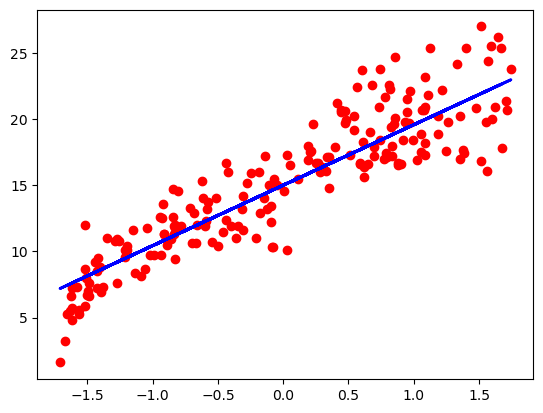

In [21]:
plt.scatter(X_scaled1, y_data1, color = 'red', label = 'scatter plot')
plt.plot(X_test1, y_pred1, color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [22]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

slopes of TV: 4.57
Intercept is: 15.0


### 다중 선형 회귀

In [23]:
# 타겟과 속성 분리하기
X_data2 = advertising.drop(['Sales'], axis =1) # TODO:YOUR_CODE_HERE
y_data2 = advertising['Sales'] # TODO:YOUR_CODE_HERE

In [24]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기

In [25]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler() # TODO:YOUR_CODE_HERE
X_scaled2 = scaler.fit_transform(X_data2)# TODO:YOUR_CODE_HERE

In [26]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [28]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2,y_data2,test_size=0.3,random_state=101)
# TODO:YOUR_CODE_HERE
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [ ]:
# 모델 생성하고 학습시키기

In [29]:
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression()# TODO:YOUR_CODE_HERE
lr_model2.fit(X_train2, y_train2)

LinearRegression()

In [30]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [31]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model2.predict(X_test2)})
mlr.head()

,Actual_value,Model prediction
37,14.7,13.913586
109,19.8,21.623432
31,11.9,12.550055
89,16.7,15.631037
66,11.0,9.093023


In [32]:
# 실제값과 예측값의 오차를 그래프로 표현

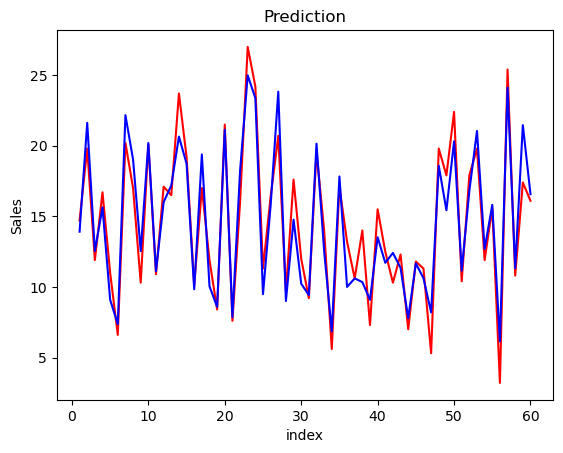

In [33]:
y_pred2 = lr_model2.predict(X_test2)
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [34]:
# 오차 그래프로 시각화하기

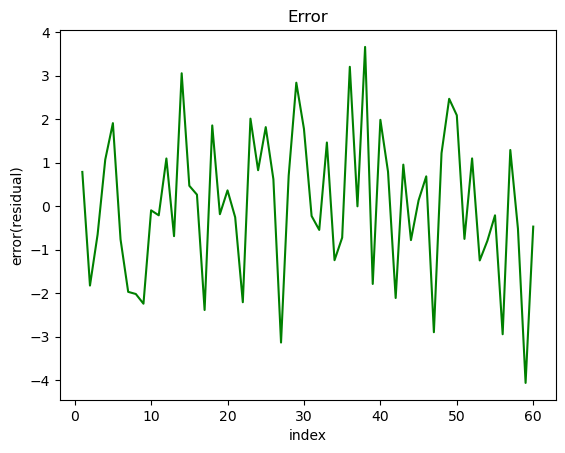

In [36]:
error2 = y_test2 - y_pred2# TODO:YOUR_CODE_HERE
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [ ]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:3.66
r2_score:0.90


In [39]:
# 기울기 계수
w2 = lr_model2.coef_# TODO:YOUR_CODE_HERE
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model2.intercept_# TODO:YOUR_CODE_HERE
print('Intercept is:', b2.round(2))

slopes of TV:4.70
slopes of Radio:1.62
slopes of Newspaper:-0.13
Intercept is: 15.12


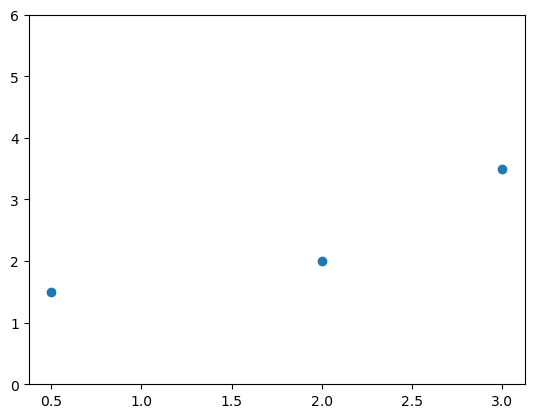

In [40]:
import matplotlib.pyplot as plt
x = [0.5, 2, 3]
y = [1.5, 2, 3.5]
plt.scatter(x, y)
plt.ylim(0, 6)
plt.show()

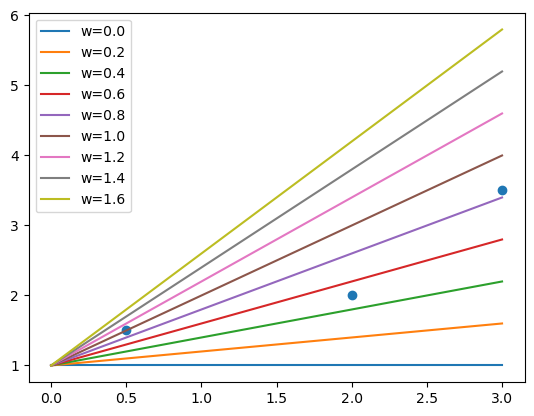

In [41]:
import numpy as np
plt.scatter(x, y)
x = np.arange(4)
w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

for w in w_range:
    y = w* x + 1
    plt.plot(x, y, label='w=' + str(w))
    plt.legend(loc = 'upper left')

In [42]:
data = [(0.5, 1.5),(2, 2), (3, 3.5)]

w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
result = []
b = 1

for w in w_range:
    sum = 0
    n = 0
    for (x, y) in data:
        y_hat = w * x + b
        n += 1
        sum += (y - y_hat)**2
    sum /= n
    result.append(round(sum, 3))
    print(f'w 값이 {w}일때 MSE 값: {sum:.3f}')

print(result)

w 값이 0.0일때 MSE 값: 2.500
w 값이 0.2일때 MSE 값: 1.377
w 값이 0.4일때 MSE 값: 0.607
w 값이 0.6일때 MSE 값: 0.190
w 값이 0.8일때 MSE 값: 0.127
w 값이 1.0일때 MSE 값: 0.417
w 값이 1.2일때 MSE 값: 1.060
w 값이 1.4일때 MSE 값: 2.057
w 값이 1.6일때 MSE 값: 3.407
[2.5, 1.377, 0.607, 0.19, 0.127, 0.417, 1.06, 2.057, 3.407]


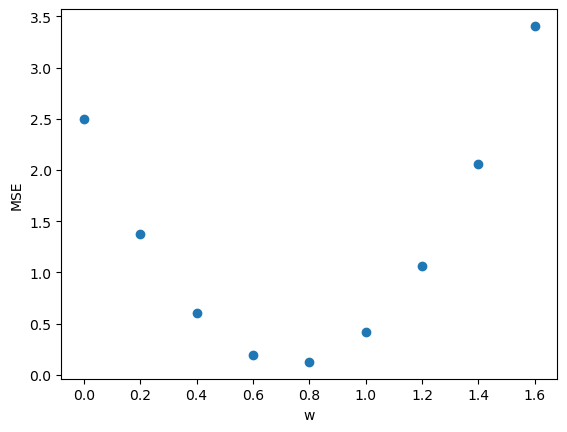

In [43]:
import matplotlib.pyplot as plt

plt.scatter(w_range, result)
plt.xlabel('w')
plt.ylabel('MSE')
plt.show()